In [87]:
import pymongo
import datetime
import collections

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats
from collections import Counter
from sklearn import cluster

In [88]:
#immigration_referendum_df = pd.read_csv("data/immigration_referendum_df.csv",index_col="Unnamed: 0")
immigration_referendum_df = pd.read_csv("data/immigration_referendum_df.csv",index_col="Unnamed: 0")
immigration_referendum_df.head()

,Area_Code,Area_x,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,14029,32071,34,0,12,6,16,30.43,69.57,0.07
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,21181,40177,35,0,16,1,18,34.52,65.48,0.06
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,24586,48128,27,0,6,0,21,33.81,66.19,0.04
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,38433,61982,45,2,13,2,28,38.27,61.73,0.04
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,24172,30994,29,0,0,0,29,43.82,56.18,0.05


# Exploration on clustering (on international incoming immigration)

In [89]:
kmeans2 = cluster.KMeans(n_clusters=2)
clustering_data_df=immigration_referendum_df[['Pct_Leave','international_in_total']]
clustering_data_df.head()

,Pct_Leave,international_in_total
0,69.57,2524
1,65.48,15883
2,66.19,3501
3,61.73,9454
4,56.18,4671


In [90]:
assignedClusters_clust = kmeans2.fit(clustering_data_df)

[]

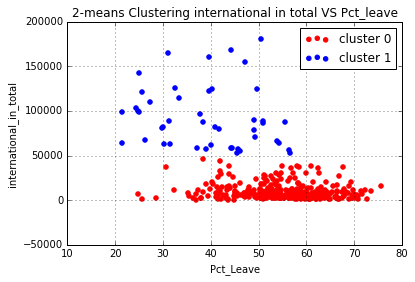

In [91]:
# Plot the data points which in the cluster labelled '0'

plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==0],
            immigration_referendum_df['international_in_total'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==1],
            immigration_referendum_df['international_in_total'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

plt.legend()

plt.xlabel('Pct_Leave')
plt.ylabel('international_in_total')

plt.title('2-means Clustering international in total VS Pct_leave')

plt.grid(True)
plt.plot()

In [92]:
immigration_referendum_df["Cluster"] = assignedClusters_clust.labels_
immigration_cluster0 = immigration_referendum_df[immigration_referendum_df["Cluster"] == 0]
immigration_cluster1 = immigration_referendum_df[immigration_referendum_df["Cluster"] == 1]

In [93]:
immigration_referendum_df.to_csv("data/anotated_immigration_in_referendum_df.csv")

In [94]:
immigration_cluster0["Pct_Leave"].describe()

count    335.000000
mean      55.015612
std        8.877142
min       24.710000
25%       50.495000
50%       55.680000
75%       61.085000
max       75.560000
Name: Pct_Leave, dtype: float64

In [95]:
immigration_cluster1["Pct_Leave"].describe()

count    46.000000
mean     39.293043
std      10.409673
min      21.380000
25%      30.362500
50%      39.810000
75%      48.480000
max      56.550000
Name: Pct_Leave, dtype: float64

# Exploration on clustering (on international net immigration)


In [96]:
kmeans2 = cluster.KMeans(n_clusters=2)
clustering_data_df=immigration_referendum_df[['Pct_Leave','international_net_total']]
clustering_data_df.head()

,Pct_Leave,international_net_total
0,69.57,546
1,65.48,8376
2,66.19,40
3,61.73,1953
4,56.18,304


In [97]:
assignedClusters_clust = kmeans2.fit(clustering_data_df)

[]

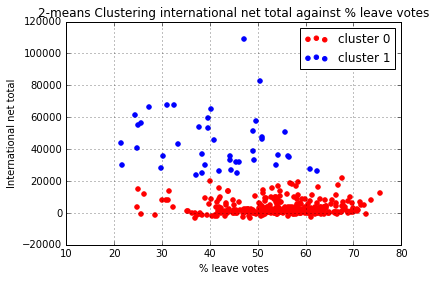

In [98]:
# Plot the data points which in the cluster labelled '0'

plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==0],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==1],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

plt.legend()

plt.xlabel('% leave votes')
plt.ylabel('International net total')

plt.title('2-means Clustering international net total against % leave votes')

plt.grid(True)

plt.plot()

The previous plot seems to indicate a huge difference between districts with over and under 20000 net immigration figures over the last decade. It's worth to investigate further.

In [99]:
immigration_referendum_df["Cluster"] = assignedClusters_clust.labels_
immigration_cluster0 = immigration_referendum_df[immigration_referendum_df["Cluster"] == 0]
immigration_cluster1 = immigration_referendum_df[immigration_referendum_df["Cluster"] == 1]

In [100]:
immigration_cluster0["Pct_Leave"].describe()

count    338.000000
mean      54.592544
std        9.372491
min       24.710000
25%       49.970000
50%       55.285000
75%       60.957500
max       75.560000
Name: Pct_Leave, dtype: float64

In [101]:
immigration_cluster1["Pct_Leave"].describe()

count    43.000000
mean     41.521628
std      10.991644
min      21.380000
25%      32.975000
50%      41.810000
75%      49.495000
max      62.440000
Name: Pct_Leave, dtype: float64

In [102]:
# immigration_referendum_df.to_csv("data/anotated_immigration_net_referendum_df.csv")

# Exploration on clustering (on international net immigration and 3 clusters)


In [103]:
kmeans3 = cluster.KMeans(n_clusters=3)
clustering_data_df=immigration_referendum_df[['Pct_Leave','international_net_total']]
clustering_data_df.head()

,Pct_Leave,international_net_total
0,69.57,546
1,65.48,8376
2,66.19,40
3,61.73,1953
4,56.18,304


In [104]:
assignedClusters_clust = kmeans3.fit(clustering_data_df)

[]

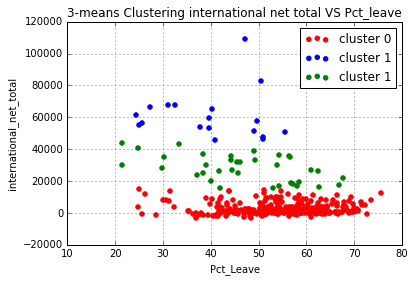

In [105]:
# Plot the data points which in the cluster labelled '0'

plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==0],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==1],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

# Plot the data points which in the cluster labelled '2'
plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==2],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==2],
            color='green', marker='o', label='cluster 1')


plt.legend()

plt.xlabel('Pct_Leave')
plt.ylabel('international_net_total')

plt.title('3-means Clustering international net total VS Pct_leave')

plt.grid(True)
#plt.savefig("asf.png")
plt.plot()

# Exploration on clustering (on international net immigration and 3 clusters)

In [106]:
kmeans4 = cluster.KMeans(n_clusters=4)
clustering_data_df=immigration_referendum_df[['Pct_Leave','international_net_total']]
clustering_data_df.head()

,Pct_Leave,international_net_total
0,69.57,546
1,65.48,8376
2,66.19,40
3,61.73,1953
4,56.18,304


In [107]:
assignedClusters_clust = kmeans4.fit(clustering_data_df)

[]

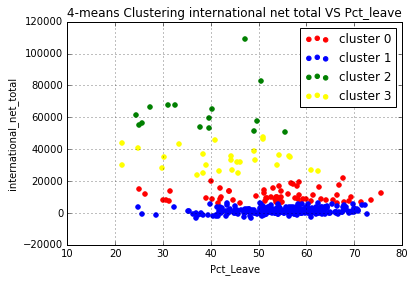

In [108]:
# Plot the data points which in the cluster labelled '0'

plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==0],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==1],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

# Plot the data points which in the cluster labelled '2'
plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==2],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==2],
            color='green', marker='o', label='cluster 2')

# Plot the data points which in the cluster labelled '3'
plt.scatter(immigration_referendum_df['Pct_Leave'][assignedClusters_clust.labels_==3],
            immigration_referendum_df['international_net_total'][assignedClusters_clust.labels_==3],
            color='yellow', marker='o', label='cluster 3')


plt.legend()

plt.xlabel('Pct_Leave')
plt.ylabel('international_net_total')

plt.title('4-means Clustering international net total VS Pct_leave')

plt.grid(True)

plt.plot()